In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

with open('attention_time_vis.pickle', 'rb') as handle:
    atten_vis = pickle.load(handle)

In [4]:
sorted_atten_vis = sorted(atten_vis, key=lambda x: x['query_rel_time'])

In [5]:
new_attn_day = []
for attn_time in sorted_atten_vis:
    temp_attn_time = {}
    temp_attn_time['query_rel_time'] = attn_time['query_rel_time']
    day_array = np.zeros((1, 365))
    for day in range(0, 365):
        if len(attn_time[day]) != 0:
            select_array = np.array(attn_time[day])#[:len(attn_time[day])//5]
            # ind = np.argpartition(select_array, -int(len(attn_time[day])*0.2))[-int(len(attn_time[day])*0.2):]
            # select_array = np.max(select_array[ind])
            select_array = np.mean(select_array)
            # select_array[np.argmax(np.mean(select_array))] = 0
            temp_attn_time[day] = select_array # if select_array <0.2 else 0
        else:
            temp_attn_time[day] = 0
        day_array[0, day] = temp_attn_time[day]
    day_array[0,np.nonzero(day_array[0, :])[0][0:2]] = 0
    new_attn_day.append(day_array)

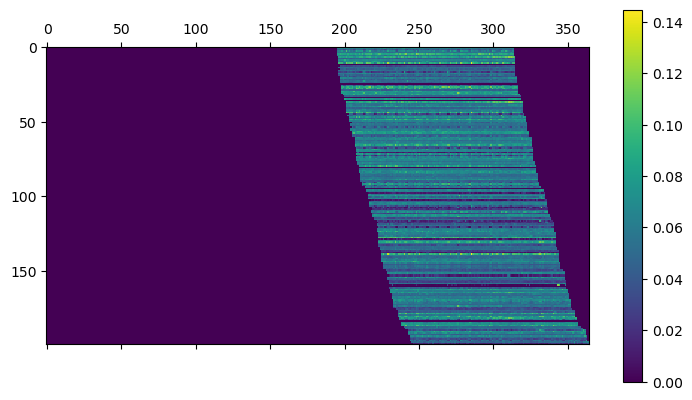

In [6]:
mat_for_vis = np.concatenate(new_attn_day, axis=0)
# mat_for_vis[mat_for_vis > 0.3] = 0
plt.matshow(mat_for_vis[:, :])
plt.colorbar()
plt.show()

In [7]:
mat_for_vis_v2 = np.zeros((mat_for_vis.shape[0], 5))

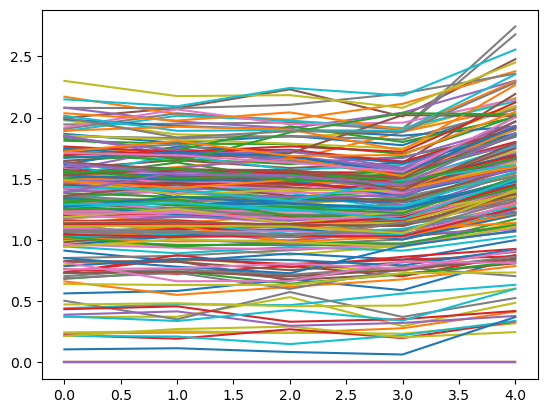

In [8]:
for i in range(len(new_attn_day)):
    nonzero_ind = np.nonzero(new_attn_day[i].reshape(-1))[0]
    nonzero_ele = new_attn_day[i].reshape(-1)[nonzero_ind]
    segement_size = len(nonzero_ind)//5
    for j in range(5):
        if j == 4:
            mat_for_vis_v2[i, j] = np.sum(nonzero_ele[j*segement_size:])
        else:
            mat_for_vis_v2[i, j] = np.sum(nonzero_ele[j*segement_size:(j+1)*segement_size])
    plt.plot(mat_for_vis_v2[i,:].reshape(-1))

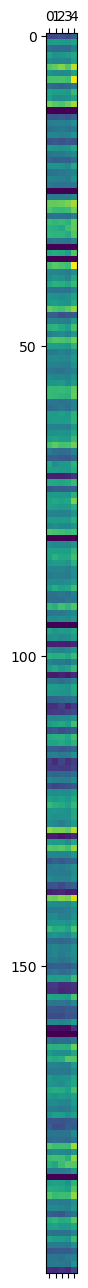

In [9]:
plt.matshow(mat_for_vis_v2)